In [23]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,1,0,40,0,-1,708,1244,589,984
1,2,0,91,0,-1,751,680,603,433
2,3,0,131,0,-1,823,1591,709,-1
3,4,0,2,2,0,880,1325,384,-1
4,5,0,87,0,-1,51,1505,11,735
...,...,...,...,...,...,...,...,...,...
159995,156,999,152,4,0,1599,375,228,-1
159996,157,999,153,4,3,1619,1420,1193,960
159997,158,999,154,4,2,190,568,765,659
159998,159,999,151,8,2,1419,1556,1581,1336


### Run CMR-IA

In [3]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [4]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.1,
    beta_cue = 0.4,
    beta_rec_post = 0.1,
    gamma_fc = 0.1,
    s_fc = 0.1,
    c_thresh_itm = 0.22,
    c_thresh_ass = 0.285,
    d_ass = 0.8,
)
params

{'beta_enc': 0.1,
 'beta_rec': 0.5,
 'beta_cue': 0.4,
 'beta_rec_post': 0.1,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.22,
 'c_thresh_ass': 0.285,
 'd_ass': 0.8,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5}

In [5]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [6]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

CMR Time: 862.4214451313019


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,1,708,1244,589,984,0.0,49.308601,0.018036
1,0,2,751,680,603,433,0.0,200.301224,0.088122
2,0,3,823,1591,709,-1,0.0,91.938705,0.049187
3,0,4,880,1325,384,-1,0.0,366.691772,0.118357
4,0,5,51,1505,11,735,0.0,386.190338,0.120948
...,...,...,...,...,...,...,...,...,...
159995,999,156,1599,375,228,-1,0.0,169.901978,0.079892
159996,999,157,1619,1420,1193,960,0.0,1791.970093,0.197685
159997,999,158,190,568,765,659,1.0,446.404572,0.311807
159998,999,159,1419,1556,1581,1336,1.0,207.812485,0.350037


In [7]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,1,708,1244,589,984,0.0,49.308601,0.018036,40,0,-1
1,0,2,751,680,603,433,0.0,200.301224,0.088122,91,0,-1
2,0,3,823,1591,709,-1,0.0,91.938705,0.049187,131,0,-1
3,0,4,880,1325,384,-1,0.0,366.691772,0.118357,2,2,0
4,0,5,51,1505,11,735,0.0,386.190338,0.120948,87,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
159995,999,156,1599,375,228,-1,0.0,169.901978,0.079892,152,4,0
159996,999,157,1619,1420,1193,960,0.0,1791.970093,0.197685,153,4,3
159997,999,158,190,568,765,659,1.0,446.404572,0.311807,154,4,2
159998,999,159,1419,1556,1581,1336,1.0,207.812485,0.350037,151,8,2


In [8]:
df_simu.groupby(['type','lag']).csim.mean()

type  lag
-1    0      0.154195
 0    2      0.167865
      4      0.170357
      6      0.170419
      8      0.170937
      16     0.170637
 1    2      0.282475
      4      0.264998
      6      0.255964
      8      0.250405
      16     0.227505
 2    2      0.331523
      4      0.320115
      6      0.312198
      8      0.308823
      16     0.291554
 3    2      0.281069
      4      0.275581
      6      0.271596
      8      0.273572
      16     0.252051
Name: csim, dtype: float64

### PLOT

In [9]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,-1,0,0.109533,0.890467
1,0,2,0.163934,0.836066
2,0,4,0.174744,0.825256
3,0,6,0.166480,0.833520
4,0,8,0.174885,0.825115
5,0,16,0.169189,0.830811
6,1,2,0.886758,0.113242
7,1,4,0.782177,0.217823
8,1,6,0.716650,0.283350
9,1,8,0.667821,0.332179


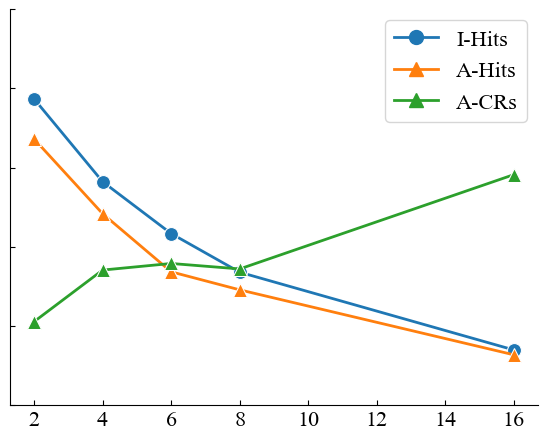

In [45]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 1], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 2], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 3], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

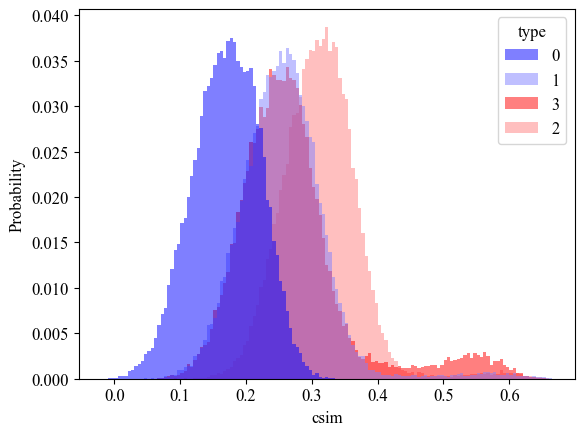

In [11]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = [0,1,3,2], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [12]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 1, 'yes_rate'].astype(float))
df_dprime['I_z_far'] = np.mean(sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 0, 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 2, 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 3, 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.209466,-0.954915,2.164382,0.979035,-0.267152,1.246187
1,4,0.779566,-0.954915,1.734481,0.648815,-0.441397,1.090212
2,6,0.572919,-0.954915,1.527835,0.435329,-0.464526,0.899855
3,8,0.433903,-0.954915,1.388818,0.373377,-0.445368,0.818745
4,16,0.175403,-0.954915,1.130318,0.159873,-0.810292,0.970164


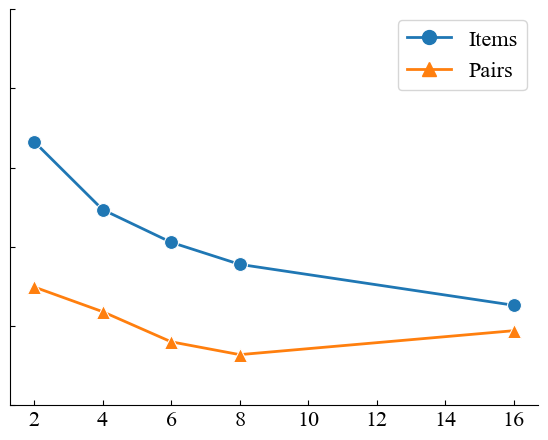

In [46]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,3])
plt.xticks(ticks=np.arange(2,18,2))
plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()